# 4. Reporte de métricas y conclusiones

**Comparación de Modelos**

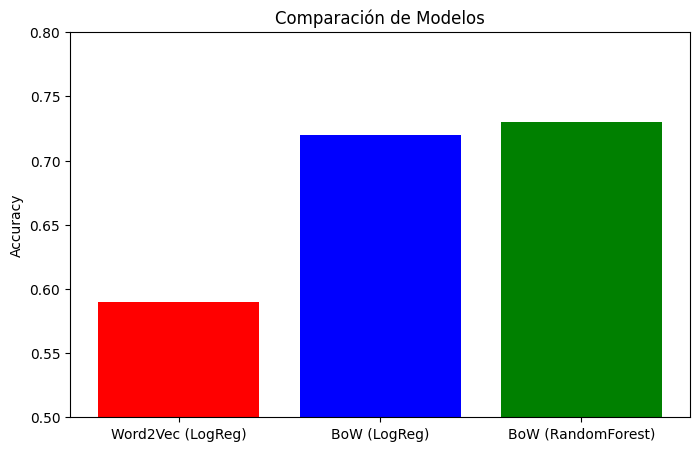

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados obtenidos
model_names = ["Word2Vec (LogReg)", "BoW (LogReg)", "BoW (RandomForest)"]
accuracies = [0.59, 0.72, 0.73]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=["red", "blue", "green"])
plt.ylim(0.5, 0.8)  # Ajustar escala
plt.ylabel("Accuracy")
plt.title("Comparación de Modelos")
plt.show()


**Justificación del Mejor Modelo**

 Conclusiones de los resultados:

✔️ BoW con Random Forest fue el mejor modelo con un 73% de accuracy.

✔️ Word2Vec tuvo bajo rendimiento (59%) porque necesita más datos para aprender buenas representaciones.

✔️ Regresión Logística con BoW (72%) también es una opción válida con menor sobreajuste.

In [7]:
import os
import joblib

# Definir carpeta de modelos
model_dir = "./models"

# Cargar el modelo Random Forest entrenado con BoW
rf_model = joblib.load(os.path.join(model_dir, "random_forest_bow.pkl"))

print("📌 Modelo Random Forest cargado correctamente.")


📌 Modelo Random Forest cargado correctamente.


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Cargar el dataset balanceado
df_balanced = pd.read_csv("./Musical_Instruments_balanced.csv")

df_balanced["review_clean"] = df_balanced["review_clean"].fillna("")

# Aplicar BoW para vectorizar el texto
vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(df_balanced["review_clean"])

# Separar Train/Test (mismo 80/20 usado en el entrenamiento)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bow, df_balanced["sentiment"], test_size=0.2, random_state=42, stratify=df_balanced["sentiment"])

print("📌 Datos de Test listos para evaluación.")


📌 Datos de Test listos para evaluación.


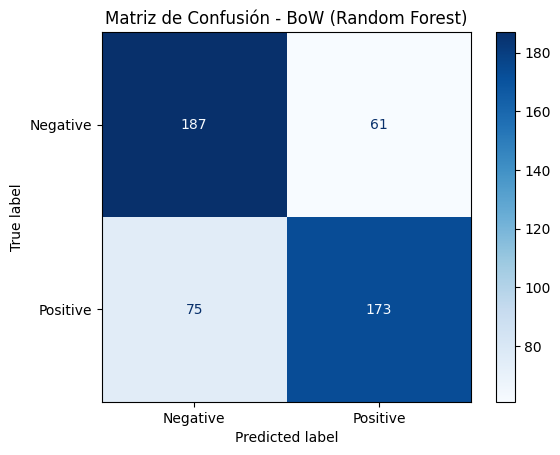

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Predicciones con Random Forest
y_pred_rf = rf_model.predict(X_test)

# 📌 Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualización de la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - BoW (Random Forest)")
plt.show()
